In [21]:
import numpy as np
import torch
import rms_torch

base_path = "array/torch/MG1D_loc/J0_0.5_J1_0.5_J2_1_J3_1/2_mel/"
# base_path = "array/quetta/BLBQ1D_loc/J0_3_J1_1_hx_0_hz_0/1_mel/"
H = - np.load(base_path + "H/0.npy")
# H2 = np.load("array/torch/HXYZ1D_loc/Jx_0.04851_Jy_5_Jz_1.043_hx_0.4123_hz_0_lt_1/H/0.npy")
# u = np.load(base_path + "Adam/lr_0.001_epoch_10000/loss_0.0000005/u/0.npy")
# u = np.load(base_path + "Adam/lr_0.005_epoch_3000/loss_0.0000099/u/0.npy")

In [22]:
from utils import stoquastic
import utils

In [23]:
# u0 = np.array([
#     [-1j/np.sqrt(2),0,1j/np.sqrt(2)],
#     [1/np.sqrt(2),0,1/np.sqrt(2)],
#     [0,1j,0]
# ])
u0 = np.array([
    [1, 0, 0, 1],
    [1,0,0,-1],
    [0,1,1,0],
    [0,1,-1,0]
]) / np.sqrt(2)
U = np.kron(u0,u0)

# q = np.diag(np.array([1,-1,-1,1,1,-1,1,1,1]))
# Q = np.copy(q)
# for i in range(3):
#     Q = np.kron(Q, q)
# Q.shape

In [27]:
utils.s(np.round(U @ H @ U.T,8))

array([[ 0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.5 ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.5 , -0.  ,  0.  ,  0.  , -0.  ,  0.  ],
       [ 0.  ,  0.25,  0.  ,  0.  ,  0.5 ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  , -0.25,  0.  ,  0.  , -0.25,  0.  ],
       [ 0.  ,  0.  ,  0.25, -0.  ,  0.  ,  0.  , -0.  ,  0.25,  0.5 ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.  , -0.25,  0.  ,  0.  ,  0.25,  0.  ,  0.  ,
        -0.25,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 ,  0.  ,  0.  ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  , -0.  ,  0.25,  0.  ,  0.  ,  0.25, -0.  ],
       [ 0.5 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.25,  0.  ,  0.  ,  0.  ,
         0.  , -0.5 ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [ 0.  ,  0.  , -0.  ,  0.25,  0.  ,  0.  ,  0.25, -0.  ,  0.  ,
         0.5 ,  0.  ,  0.  ,  0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.25,  0.  ,  0.  ,  0.  , -0.  , -0.25, -0.25,
         0.  ,  0.  ,  0. 

In [29]:
L = 4
h1 = H
h2_ = (U @ H @ U.T.conj()).real
h2 = utils.stoquastic(h2)
HS1 = utils.sum_ham(h1, [[i, (i+1)%L] for i in range(L-1)], L, 4)
HS2 = utils.sum_ham(h2, [[i, (i+1)%L] for i in range(L-1)], L, 4)
HS2 = utils.stoquastic(HS2)

In [30]:
e2, v2 = np.linalg.eigh(h1)
e1, v1 = np.linalg.eigh(h2)
E1, V2 = np.linalg.eigh(HS1)
E2, V1 = np.linalg.eigh(HS2)

In [31]:
beta = 1
np.exp(-beta * E1).sum() / np.exp(-beta * E2).sum()

1.0000000000000007

In [445]:
J = np.array([-1, 5, 0.3])
h = np.array([0.1, 0, 0.4])

In [313]:
import numpy as np
from lattice.core.constants import *

In [314]:
SySy

array([[ 0.  ,  0.  ,  0.  , -0.25],
       [ 0.  ,  0.  ,  0.25,  0.  ],
       [ 0.  ,  0.25,  0.  ,  0.  ],
       [-0.25,  0.  ,  0.  ,  0.  ]])

In [315]:
SzSz

array([[ 0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25,  0.  , -0.  ],
       [ 0.  ,  0.  , -0.25, -0.  ],
       [ 0.  , -0.  , -0.  ,  0.25]])

In [87]:
import numpy as np

def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return r, theta, phi

def rotation_matrix(theta, phi):
    # Convert angles from degrees to radians

    # Rotation matrix around the x-axis
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(phi), -np.sin(phi)],
                   [0, np.sin(phi), np.cos(phi)]])
    
    
    # Rotation matrix around the z-axis
    Rz = np.array([[np.cos(theta), 0, -np.sin(theta)],
                   [0, 1, 0],
                   [np.sin(theta), 0, np.cos(theta)]])
    
    print(Rz)

    # Combined rotation matrix (Rz first, then Rx)
    R = np.dot(Rz, Rx)

    return R

r, theta, phi = cartesian_to_spherical(h[0], h[1], h[2])

In [93]:
import scipy
U2 = scipy.linalg.expm(-1j * theta * Sy)

In [99]:
U2.T.conj() @ Sx @ U2

array([[ 0.12126782+0.j,  0.48507127+0.j],
       [ 0.48507127+0.j, -0.12126782+0.j]])

In [105]:
J = np.array([-1, 5, 0.3])
h = np.array([0, 0, 0])
rot = (np.pi/2 - theta)/2
R = rotation_matrix(0.1, phi)


h = R.T @ R.T @ h
J = R.T @ J
h_single = h[2] * Sz + h[0] * Sx
h_single = np.kron(h_single, I2) + np.kron(I2, h_single)

H = J[0] * SxSx + J[1] * SySy + J[2] * SzSz + h_single
np.linalg.eigvalsh(H)

[[ 0.99500417  0.         -0.09983342]
 [ 0.          1.          0.        ]
 [ 0.09983342  0.          0.99500417]]


array([-1.39167987, -1.10832013,  0.9091528 ,  1.5908472 ])

In [109]:
H.shape

(16, 16)

In [225]:
import scipy
A = np.random.rand(4,4)
A = A - A.T
C = np.random.normal(size=(16, 16))
C = C + C.T
C += np.eye(C.shape[0])
S = np.sign(C)
lr = 0.001
u = scipy.linalg.expm(lr * A)
U = np.kron(u,u)
B = U @ C @ U.T

In [227]:
A_kron = np.kron(np.eye(4), A) + np.kron(A, np.eye(4))
V = lr * S * (A_kron @ C - C @ A_kron)

In [228]:
D = np.abs(B) - np.abs(C) 
np.linalg.norm(D - V)

3.32892918971711e-05

In [235]:
Ec, Vc = np.linalg.eigh(np.abs(C))
Eb, Vb = np.linalg.eigh(np.abs(B))

In [236]:
Vc[:,-1] @(np.abs(B) - np.abs(C)) @ Vc[:,-1]

0.0015303424247277374

In [231]:
Vc[:,-1] @ V @ Vc[:,-1]

0.0015471042778119751

In [169]:
Ec[-1] - Eb[-1]

0.0005381927101524298

In [244]:
A = np.random.rand(4,4)
A = A - A.T
C = np.random.normal(size=(16, 16))
C = np.copy(H)
C += np.eye(C.shape[0])
S = np.sign(C)

In [245]:
lr = 0.001
u = scipy.linalg.expm(lr * A)
U = np.kron(u,u)
B = U @ C @ U.T

In [246]:
Ec, Vc = np.linalg.eigh(np.abs(C))
Eb, Vb = np.linalg.eigh(np.abs(B))

In [247]:
Ec[-1]

2.250000000000001

In [248]:
Eb[-1]

2.2502670342126136

In [240]:
D = U @ C @ U.T - C
DS = np.round(S * D,3)

In [241]:
np.abs(C) - np.abs(B)

array([[-1.18461542e-06, -1.93680935e-04, -5.81763744e-04,
        -5.39955093e-04, -5.81570727e-04, -2.69953816e-04,
        -2.70171237e-04, -3.51983840e-07, -1.93993391e-04,
        -2.69870533e-04, -2.69787398e-04, -6.66706471e-08,
        -5.40050845e-04, -6.68596866e-08, -4.85459433e-07,
        -5.83070183e-07],
       [-1.93680935e-04,  7.66723266e-05,  7.71463330e-05,
        -3.17806155e-05, -7.69838853e-05, -2.53773342e-04,
        -1.64031060e-04, -5.97740598e-08, -2.00875133e-07,
        -3.57838347e-04, -5.98006983e-08, -2.69978013e-04,
        -1.64012402e-04, -2.70032760e-04, -1.90728072e-07,
        -2.22627374e-07],
       [-5.81763744e-04,  7.71463330e-05, -7.66575617e-05,
        -3.03610107e-05,  5.40528653e-07, -2.04295561e-04,
        -9.16181335e-05, -2.69962621e-04,  7.69992451e-05,
        -1.02248812e-04, -1.93817827e-04, -6.70275139e-08,
        -2.25256559e-04, -8.98186882e-09, -2.70001710e-04,
        -6.64013536e-08],
       [-5.39955093e-04, -3.17806155e

In [249]:
Vc[:,-1] @(np.abs(C) - np.abs(B)) @ Vc[:,-1]

-0.0002594141697731783

In [250]:
Ec[-1] - Eb[-1]

-0.00026703421261276006

In [265]:
(C @ A_kron - A_kron @ C)*S

array([[ 0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        -0.        , -0.        ,  0.        , -0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.17394196,  0.17394196, -0.        , -0.17394196,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.        , -0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.        ,  0.17394196, -0.17394196, -0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.17394196, -0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        ],
       [ 0.        , -0.        , -0.        ,  0.        , -0.        ,
        -0.17394196,  0.17394196, -0.        ,  0.        ,  0.17394196,
        -0.        , -0.        ,  0.        , -0.        , -0.        ,
        -0.        ],
       [ 0.        , -0.17394196, -0

## Optimize random Hamiltonian

In [72]:
# A = np.array([
#     [1, -1, 1, 1],
#     [-1, 1, 1, 1],
#     [1, 1, 1, -1],
#     [1,1,-1,1]
# ])

# e_, v_ = np.linalg.eigh(A)
# v_ = np.ones(4)
# v_ /= np.linalg.norm(v_)
# v_ @ A @ v_

# A = -A
# A = A

In [273]:
import scipy
import utils
sps = 2
A = np.random.normal(size=(sps**2, sps**2))
A = A + A.T
A -= np.eye(sps**2) * 4
h_list = [A]


loss = rms_torch.SystemQUasiEnergyLoss(h_list, device="cpu")
model = rms_torch.UnitaryRieman(
    h_list[0].shape[1], sps**2, device="cpu").to("cpu")
model.reset_params(torch.from_numpy(np.eye(sps**2)))
loss(model())

tensor(0.5092, dtype=torch.float64, grad_fn=<SubBackward0>)

In [492]:
A

array([[-2.31274089, -0.93901353, -0.78545499, -0.26137985],
       [-0.93901353, -1.17831392, -1.41273449, -1.11019503],
       [-0.78545499, -1.41273449, -2.16918455, -0.70392968],
       [-0.26137985, -1.11019503, -0.70392968, -2.7440262 ]])

In [559]:
sps = 4
for j in range(100):
    for _ in range(100):
        A = -np.random.normal(size=(sps**2, sps**2))
        A = A + A.T
        A -= np.eye(sps**2) * 4
        h_list = [A]
        loss = rms_torch.SystemQUasiEnergyLoss(h_list, device="cpu")
        model = rms_torch.UnitaryRieman(
            h_list[0].shape[1], sps, device="cpu").to("cpu")
        model.reset_params(torch.from_numpy(np.eye(sps)))
        loss(model())

        optimizer = rms_torch.Adam(model.parameters(),lr=0.01)

        prev_loss = None
        pu = 100
        sign_list = []
        for _ in range(100000):
            optimizer.zero_grad()
            output = model()
            loss_val = loss(output)
            loss_val_item = loss_val.item()
            loss_val.backward()
            for p in model.parameters():
                grad = p.grad
                if grad is not None:
                    grad.data[:] = rms_torch.riemannian_grad_torch(p.data, grad)
            optimizer.step()
            u1 = list(model.parameters())[0].detach().numpy()
            if prev_loss is not None:
                if (prev_loss < loss_val_item):
                    break
            prev_loss = np.copy(loss_val_item)
            pu = np.copy(u1)
        print(loss_val_item, prev_loss)
        if loss_val_item > 1e-2:
            break

    optimizer = rms_torch.Adam(model.parameters(),lr=0.00005)

    prev_loss = None
    pu = 100
    sign_list = []
    i = 0
    while (True):
        optimizer.zero_grad()
        output = model()
        loss_val = loss(output)
        loss_val_item = loss_val.item()
        loss_val.backward()
        for p in model.parameters():
            grad = p.grad
            if grad is not None:
                grad.data[:] = rms_torch.riemannian_grad_torch(p.data, grad)
        optimizer.step()
        u1 = list(model.parameters())[0].detach().numpy()
    #     if prev_loss is not None:
    #         if (prev_loss < loss_val_item):
    #             break
        if i == 5000: 
            break
        prev_loss = np.copy(loss_val_item)
        pu = np.copy(u1)
        i += 1
    print(loss_val_item, prev_loss)
#     U1 = u1
#     Pu = pu
    U1 = np.kron(u1, u1)
    Pu = np.kron(pu, pu)
    if np.sum(np.abs(U1@h_list[0]@U1.T) < 0.001) != 0:
        print(np.sum(np.abs(U1@h_list[0]@U1.T) < 0.001))
    else:
        print("Optimize finish")
        break

6.699791217635056 6.679930652931976
6.259439346765696 6.259496743453688
10
7.838845440671097 7.8370649076280685
7.770474012499193 7.770473623695814
12
6.047088509726684 6.045013473481923
5.995755905585554 5.995731876760878
14
9.147842719267086 9.14180308619018
7.4165680899814745 7.416585523439256
4
7.279489019512738 7.276258250059314
7.19064026437643 7.1906835616219205
6
5.287237055964649 5.286847714615174


KeyboardInterrupt: 

In [496]:
optimizer = rms_torch.Adam(model.parameters(),lr=0.0001)

prev_loss = None
pu = 100
sign_list = []
i = 0
while (True):
    optimizer.zero_grad()
    output = model()
    loss_val = loss(output)
    loss_val_item = loss_val.item()
    loss_val.backward()
    for p in model.parameters():
        grad = p.grad
        if grad is not None:
            grad.data[:] = rms_torch.riemannian_grad_torch(p.data, grad)
    optimizer.step()
    u1 = list(model.parameters())[0].detach().numpy()
#     if prev_loss is not None:
#         if (prev_loss < loss_val_item):
#             break
    if i == 10000: 
        break
    prev_loss = np.copy(loss_val_item)
    pu = np.copy(u1)
    i += 1
    print(loss_val_item, prev_loss)
U1 = u1
Pu = pu

0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404
0.05922972666430404 0.05922972666430404


In [499]:
U1 = np.kron(u1, u1)

In [500]:
print(np.sum(np.abs(U1@h_list[0]@U1.T) < 0.001))

0


In [501]:
np.abs(U1@h_list[0]@U1.T)

array([[2.55353423, 1.91231344, 0.03273464, 2.82293676],
       [1.91231344, 5.13892661, 0.27564528, 1.46918268],
       [0.03273464, 0.27564528, 4.2138648 , 0.52685713],
       [2.82293676, 1.46918268, 0.52685713, 3.27884316]])

In [502]:
U1 = np.kron(u1, u1)
Pu = np.kron(pu, pu)
# U1 = u1
# Pu = pu
print(np.sum(np.abs(U1@h_list[0]@U1.T) < 0.001))
np.sign(U1@h_list[0]@U1.T) - np.sign(Pu@h_list[0]@Pu.T)

0


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [503]:
EUS, VUS = np.linalg.eigh(utils.stoquastic(U1@h_list[0]@U1.T))
ES, VS = np.linalg.eigh(h_list[0])

In [510]:
EUS[0] - ES[0]

-0.059229834807361215

In [552]:
B = U1@A@U1.T
S = -np.sign(B)
g = np.random.normal(size=(sps, sps))
g = g - g.T
G = np.kron(g,np.eye(sps)) + np.kron(np.eye(sps), g)
# G = np.random.normal(size=(sps**2, sps**2))
e, V = np.linalg.eigh(utils.stoquastic(B))
v = V[:,0]
v @ (S*(G@B - B@G)) @ v

-5.6906071327638346e-08

In [555]:
S

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1., -1.,  1.],
       [ 1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [554]:
G@B - B@G

array([[-3.26721627, -4.31084155, -3.53390009, -0.04282696],
       [-4.31084155,  0.74435386, -0.04282696,  3.70166866],
       [-3.53390009, -0.04282696, -0.83000778,  2.9247272 ],
       [-0.04282696,  3.70166866,  2.9247272 ,  3.3528702 ]])

In [547]:
e, V = np.linalg.eigh(B)
v0= V[:,0]

In [548]:
B

array([[-2.55353423, -1.91231344, -0.03273464, -2.82293676],
       [-1.91231344, -5.13892661,  0.27564528, -1.46918268],
       [-0.03273464,  0.27564528, -4.2138648 , -0.52685713],
       [-2.82293676, -1.46918268, -0.52685713, -3.27884316]])

In [549]:
v

array([0.51699077, 0.65381706, 0.12979911, 0.53702513])

In [526]:
G@B - B@G

array([[ 4.11564835,  5.43028268,  4.45158473,  0.05394828],
       [ 5.43028268, -0.93764798,  0.05394828, -4.66291952],
       [ 4.45158473,  0.05394828,  1.04554455, -3.68422157],
       [ 0.05394828, -4.66291952, -3.68422157, -4.22354492]])

In [519]:
G@B - B@G

array([[ 1.89352887,  2.49836626,  2.04808659,  0.02482054],
       [ 2.49836626, -0.43139339,  0.02482054, -2.14531757],
       [ 2.04808659,  0.02482054,  0.48103448, -1.69503789],
       [ 0.02482054, -2.14531757, -1.69503789, -1.94316995]])

In [505]:
utils.stoquastic(B) - S*B

array([[-4.29083920e+00, -3.39430721e+00, -1.18077603e-01,
        -1.14025695e+00],
       [-3.39430721e+00, -1.12263250e+01, -7.36512384e-03,
        -3.84099218e-01],
       [-1.18077603e-01, -7.36512384e-03, -1.04587728e+01,
        -2.76301681e+00],
       [-1.14025695e+00, -3.84099218e-01, -2.76301681e+00,
        -1.25052029e+00]])

In [506]:
e, V = np.linalg.eigh(utils.stoquastic(B))
v = V[:,0]

### Check if the optimized matrix islocal minimum point

In [511]:
import scipy
B1 = U1@h_list[0]@U1.T
diff = []
for _ in range(5000):
    G = np.random.normal(size=(sps,sps))
    if _%4 == 0:
        G = G - G.T
    S = np.sign(B1)
    lr = 0.00001
    v = scipy.linalg.expm(lr * G)
    V = np.kron(v,v)
    B2 = V @ B1 @ np.linalg.inv(V)
    EUS2, VUS2 = np.linalg.eig(utils.stoquastic(B2))
    ES2, VS2 = np.linalg.eig(utils.stoquastic(B1))
    diff.append(np.min(EUS2.real) - np.min(ES2.real))

### The value will increase for all gradient direction.

This mean first order of gradient is 0

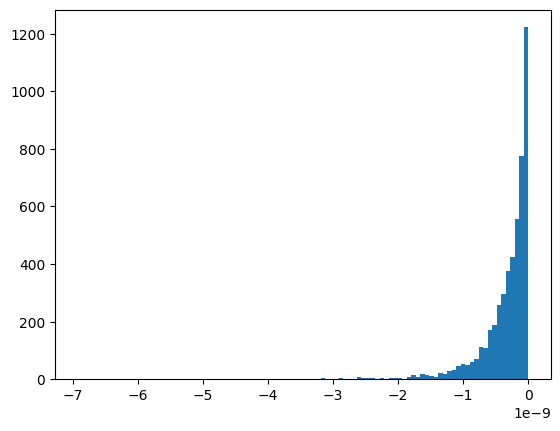

In [512]:
from matplotlib import pyplot as plt

plt.hist(diff, bins = 100)
plt.show()

In [846]:
lr = 0.001
quasi_diff = []
B1 = U1@h_list[0]@U1.T
# B1 = np.copy(AU)
for _ in range(100):
    g = np.random.rand(sps, sps)
    g = g - g.T
    for _ in range(2):
        g = -g
        v = scipy.linalg.expm(lr * g)
        V = np.kron(v,v)
        B2 = V @ B1 @ V.T
        EUS2, VUS2 = np.linalg.eigh(utils.stoquastic(B2))
        ES2, VS2 = np.linalg.eigh(utils.stoquastic(B1))
    #     idxu = np.argmin(EUS2.real)
    #     idx = np.argmin(ES2.real)
        idxu = 0
        idx = 0
        eus20 = EUS2.real[idxu]
        es20 = ES2.real[idx]
        diff = es20 - eus20
        C = np.sign(B1)
        C2 = np.sign(B2)
    #     print((C==0).sum())
    #     print("diff:", diff)
        ev = VS2[:, idx]
    #     print("peterbation diff : ",ev @ -(utils.stoquastic(B2)-utils.stoquastic(B1))@ ev)
        G = np.kron(np.eye(sps), g) + np.kron(g, np.eye(sps))
        R = G @ B1 - B1 @ G
        np.linalg.norm(B1 + lr * R - B2)
    #     print(np.linalg.norm(ev @ (utils.stoquastic(B2) + B1*C) @ ev))
    #     print(ev @ ((B1 - B2)*C) @ ev)
    #     print(ev @ (R*C) @ ev)
        Tp = utils.stoquastic(B2) - (-C * B2) 
    #     Tp /= lr
    #     print(np.round(Tp,3))
        print("quasi diff : ", (ev @ (-R*C*lr+ Tp) @ ev))
        quasi_diff.append(((ev @ (-R*C*lr+ Tp) @ ev), (ev @ (-R*C*lr) @ ev), ev @ Tp @ ev, Tp, -R*C*lr+ Tp))

quasi diff :  -0.00040676878145137383
quasi diff :  -0.0004427421520211478
quasi diff :  -0.0013734185158490635
quasi diff :  -0.002089537364039472
quasi diff :  -0.0011977690493449396
quasi diff :  -0.0014534617547886403
quasi diff :  -0.0025724730496809634
quasi diff :  -0.001575007840449868
quasi diff :  -0.0006316689912632045
quasi diff :  -0.001210382262220346
quasi diff :  -0.0006176475805801156
quasi diff :  -0.00028473031466759826
quasi diff :  -0.0018421519529082005
quasi diff :  -0.0024151438411559446
quasi diff :  -0.0013063501222331311
quasi diff :  -0.0010961332383450455
quasi diff :  -0.0013805366313090067
quasi diff :  -0.0006503392783727637
quasi diff :  -0.001117566874657246
quasi diff :  -0.0027227468163563704
quasi diff :  -0.0025387977856039076
quasi diff :  -0.0014294193433117012
quasi diff :  -0.0014804270968845328
quasi diff :  -0.0031745841984584244
quasi diff :  -0.0035620163275408524
quasi diff :  -0.001967913014427701
quasi diff :  -0.0018410803384712173
quas

In [847]:
np.min(np.abs(B1))

5.7879947519067235e-08

In [852]:
ev 






@ quasi_diff[0][-1] @ ev

-0.00040676878145137383

# MG model

In [37]:
import numpy as np
import torch
import rms_torch
from utils import stoquastic
import lattice
import utils

In [64]:
params = dict(
    J0 = 0.5,
    J1 = 0.5,
    J2 = 1,
    J3 = 1,
    lt = 2,
    obc = False,
)
u0 = np.array([
    [1, 0, 0, 1],
    [1,0,0,-1],
    [0,1,1,0],
    [0,1,-1,0]
]) / np.sqrt(2)
U = np.kron(u0,u0)

In [65]:
H,_,_ = lattice.get_model("MG1D", params)
H = H[0]
L = 4
h1 = H
h2_ = (U @ H @ U.T.conj()).real
h2 = utils.stoquastic(h2)
HS1 = utils.sum_ham(h1, [[i, (i+1)%L] for i in range(L-1)], L, 4)
HS2 = utils.sum_ham(h2, [[i, (i+1)%L] for i in range(L-1)], L, 4)
HS2 = utils.stoquastic(HS2)

e2, v2 = np.linalg.eigh(h1)
e1, v1 = np.linalg.eigh(h2)
E1, V2 = np.linalg.eigh(HS1)
E2, V1 = np.linalg.eigh(HS2)

beta = 1
np.exp(-beta * E1).sum() / np.exp(-beta * E2).sum()

1.0000000000000007

# Check unitary

In [162]:
base_path = "array/quetta/MG1D_loc/J1_1_J2_1_J3_2.4/2_mel/"
# base_path = "array/quetta/BLBQ1D_loc/J0_3_J1_1_hx_0_hz_0/1_mel/"
H = -np.load(base_path + "H/0.npy")
summary_files = utils.path.find_summary_files(base_path)
df = utils.path.get_df_from_summary_files(summary_files, 1000000)
print(df.u_path[4])
u = np.load(base_path + "Adam/lr_0.007_epoch_2000/loss_0.0000004/u/0.npy")
U = np.kron(u,u)

/home/keisuke/worms/python/rmsKit/array/torch/MG1D_loc/J1_1_J2_1_J3_2.4/2_mel/Adam/lr_0.003_epoch_5000/loss_0.0000004/u/0.npy


In [164]:
L = 5
h1 = H
h2_ = (U @ H @ U.T.conj()).real
h2 = utils.stoquastic(h2_)
HS1 = utils.sum_ham(h1, [[i, (i+1)%L] for i in range(L)], L, 4)
HS2 = utils.sum_ham(h2_, [[i, (i+1)%L] for i in range(L)], L, 4)
HS2 = utils.stoquastic(HS2)

e2, v2 = np.linalg.eigh(h1)
e1, v1 = np.linalg.eigh(h2)
E1, V2 = np.linalg.eigh(HS1)
E2, V1 = np.linalg.eigh(HS2)

beta = 4
np.exp(-beta * E1).sum() / np.exp(-beta * E2).sum()

0.25000024417588745

In [165]:
E2

array([-9.28028301, -9.28028298, -9.28028298, ...,  6.49021913,
        6.75      ,  6.75      ])

In [166]:
E1

array([-9.27963883, -7.21869708, -7.21869708, ...,  6.75      ,
        6.75      ,  6.75      ])

In [143]:
E1[:10]

array([-7.42962683, -7.42962683, -7.42962683, -7.42863999, -5.81767785,
       -5.80201202, -5.80201202, -5.80201202, -5.78159438, -5.78159438])

In [147]:
df["as"], df.u_path[0]

(0     0.920290
 1     0.248522
 2     0.942022
 3     0.249852
 4     0.923790
 5     0.250874
 6     0.942410
 7     0.251920
 8     0.169782
 9     0.001580
 10    0.143308
 11   -0.000760
 12    0.169918
 13   -0.001068
 14    0.144084
 15    0.000860
 Name: as, dtype: float64,
 '/home/keisuke/worms/python/rmsKit/array/torch/MG1D_loc/J1_1_J2_1_J3_2.4/2_mel/Adam/lr_0.007_epoch_2000/loss_0.0000004/u/0.npy')